<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



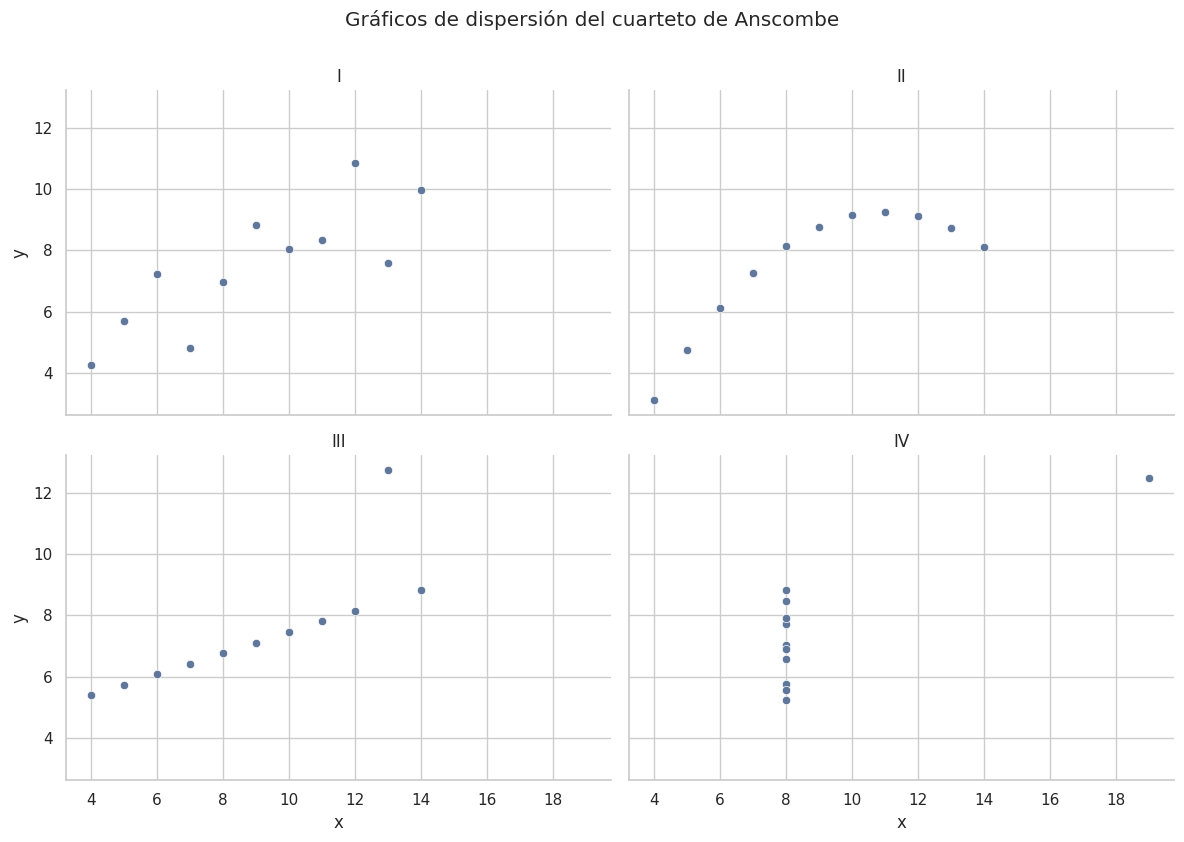

In [2]:
# Crear gráficos de dispersión para cada conjunto de datos
graf = sns.FacetGrid(data, col="dataset", col_wrap=2, height=4, aspect=1.5)
graf.map(sns.scatterplot, "x", "y")

# Ajustar el diseño de los gráficos
graf.set_titles("{col_name}")
graf.set_axis_labels("x", "y")
plt.suptitle("Gráficos de dispersión del cuarteto de Anscombe", y=1.05)
plt.show()

Respuesta:
Hay una clara diferencia en la relación de los datos en los 4 gráficos:
- En el gráfrico I se puede notar que los datos aumentan de manera positiva y constante y que se ajusta de buena forma mediante regresión lineal.
- En el gráfico II se puede observar una relación cuadrática de los datos que no se ajusta de buena forma a una regresión lineal.
- En el gráfico III también se ve una tendencia lineal como en el gráfico I, pero en donde existe un dato atípico dentro del conjunto.
- En el gráfico IV se observa una relación vertical de los datos en su mayoría exceptuando por un dato atípico en x=18, claramente no se ajusta a una representación lineal.


2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
describe = data.groupby("dataset").describe()
describe

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Respuesta:
Podemos notar que las medias y desviasiones estandar son bastante similares en los 4 casos, así como los cuartiles en el eje y, la principal diferencia se encuentra en los cuartiles en el eje x donde en el los datos del conjunto IV al estar agrupados al rededor de x=8 influye en la distribucion de los datos con respecto a los otros 3 conjuntos.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



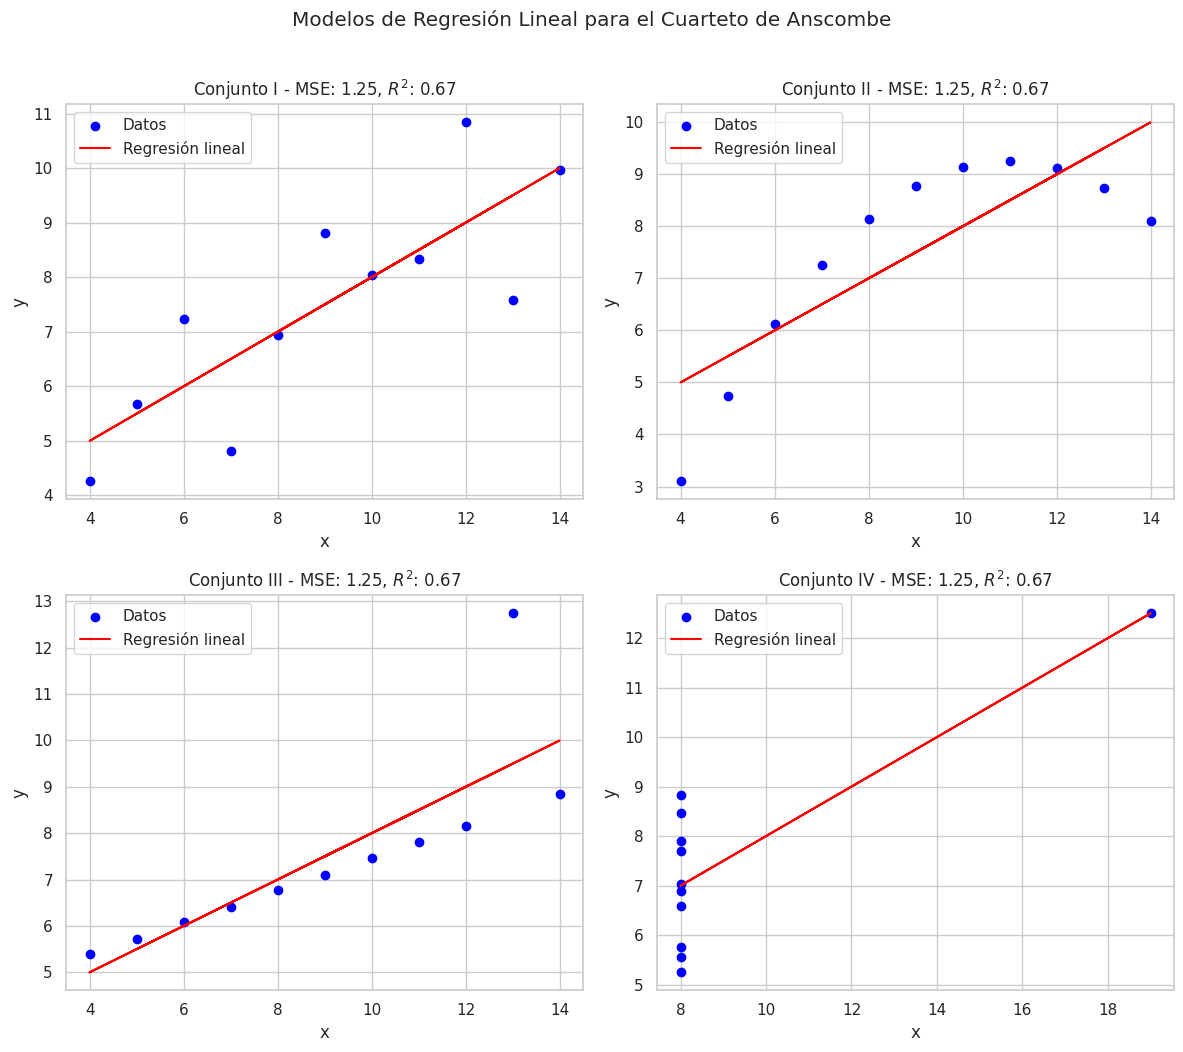

  Conjunto       MSE     $R^2$
0        I  1.251154  0.666542
1       II  1.252390  0.666242
2      III  1.250563  0.666324
3       IV  1.249317  0.666707


In [4]:
# Inicializar listas para almacenar los resultados de las métricas
MSE = []
R2 = []

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Iterar para cada conjunto de datos
for i, group in enumerate(data['dataset'].unique(), 1):
    # Filtrar el conjunto de datos
    filtro = data[data['dataset'] == group]

    # Separar las variables x e y
    x = filtro['x'].values.reshape(-1, 1)
    y = filtro['y'].values

    # Crear un modelo de regresión lineal y hacer predicciones
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Calcular las métricas y añadirlas a las listas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    MSE.append(mse)
    R2.append(r2)

    # Crear el gráfico de dispersión
    plt.subplot(2, 2, i)
    plt.scatter(x, y, color='blue', label='Datos')
    plt.plot(x, y_pred, color='red', label='Regresión lineal')
    plt.title(f'Conjunto {group} - MSE: {mse:.2f}, $R^2$: {r2:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.suptitle("Modelos de Regresión Lineal para el Cuarteto de Anscombe", y=1.05)
plt.show()

# Mostrar las métricas de evaluación para cada grupo
metricas_df = pd.DataFrame({
    'Conjunto': data['dataset'].unique(),
    'MSE': MSE,
    '$R^2$': R2
})
print(metricas_df)


Respuesta: El primer gráfico y tercero tienen una buena representación por medio de la regresión lineal, por otro lado para el segundo gráfico conviene mas hacer una regresión del tipo polinomial (cuadrática). Además, para el tercer y cuarto gráfico conviene eliminar los puntos lejanos (outliers).


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

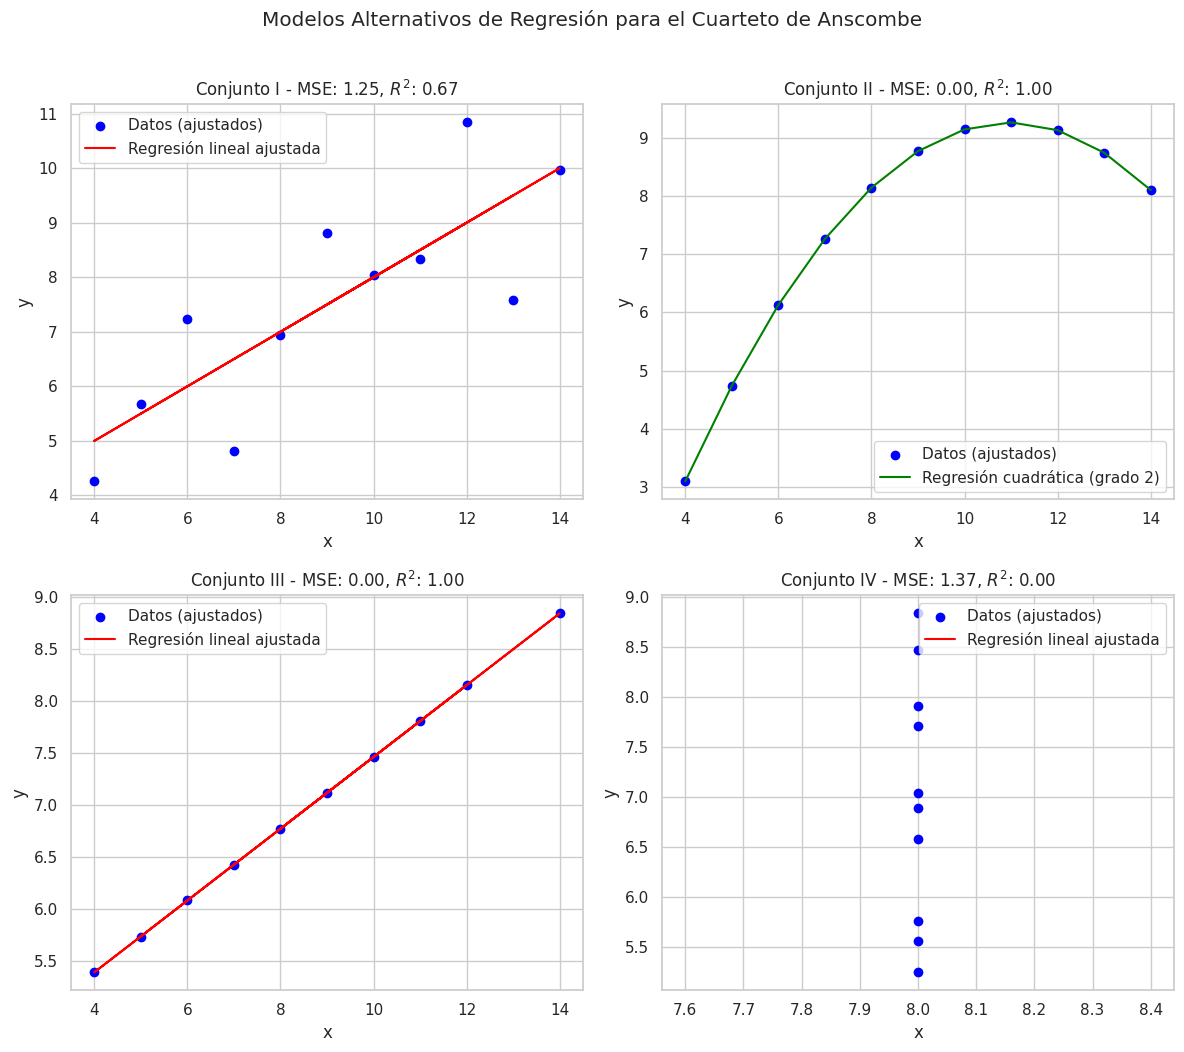

  Conjunto  MSE (Ajustado)  $R^2$ (Ajustado)
0        I        1.251154          0.666542
1       II        0.000002          0.999999
2      III        0.000008          0.999993
3       IV        1.374249          0.000000


In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Función para eliminar puntos lejanos
def delet(x, y):
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]

# Inicializar listas para almacenar los resultados de las métricas
MSE_ajustados = []
R2_ajustados = []

plt.figure(figsize=(12, 10))

for i, group in enumerate(data['dataset'].unique(), 1):
    subset = data[data['dataset'] == group]

    # Separar las variables x e y
    x = subset['x'].values.reshape(-1, 1)
    y = subset['y'].values

    # Eliminar puntos para los conjuntos III y IV
    if group in ['III', 'IV']:
        x, y = delet(x, y)

    # Crear regresiones
    if group == 'II':  # Regresión cuadrática
        poly = PolynomialFeatures(degree=2)
        x_poly = poly.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_pred = model.predict(x_poly)
        x_sorted, y_pred_sorted = zip(*sorted(zip(x.flatten(), y_pred))) # Ordenar los valores

    else:  # Regresión lineal
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

    # Calcular las métricas y añadirlas a las listas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    MSE_ajustados.append(mse)
    R2_ajustados.append(r2)

    # Crear el gráfico de dispersión y la regresión ajustada
    plt.subplot(2, 2, i)
    plt.scatter(x, y, color='blue', label='Datos (ajustados)')
    if group == 'II':
        plt.plot(x_sorted, y_pred_sorted, color='green', label='Regresión cuadrática (grado 2)')
    else:
        plt.plot(x, y_pred, color='red', label='Regresión lineal ajustada')
    plt.title(f'Conjunto {group} - MSE: {mse:.2f}, $R^2$: {r2:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

# Ajustar los espacios
plt.tight_layout()
plt.suptitle("Modelos Alternativos de Regresión para el Cuarteto de Anscombe", y=1.05)
plt.show()

# Mostrar las nuevas métricas
metricas_ajustadas_df = pd.DataFrame({
    'Conjunto': data['dataset'].unique(),
    'MSE (Ajustado)': MSE_ajustados,
    '$R^2$ (Ajustado)': R2_ajustados
})
print(metricas_ajustadas_df)